In [2]:
import pandas as pd 

In [3]:
bangalore_df = pd.read_excel(r"S:\Car\ML ready data\bangalore_car_detail.xlsx")
chennai_df = pd.read_excel(r"S:\Car\ML ready data\chennai_car_detail.xlsx")
delhi_df = pd.read_excel(r"S:\Car\ML ready data\delhi_car_detail.xlsx")
hyderabad_df = pd.read_excel(r"S:\Car\ML ready data\hyderabad_car_detail.xlsx")
jaipur_df = pd.read_excel(r"S:\Car\ML ready data\jaipur_car_detail.xlsx")
kolkata_df = pd.read_excel(r"S:\Car\ML ready data\Kolkata_car_detail.xlsx")

In [4]:
chennai_df['City'] = 'Chennai'
delhi_df['City'] = 'Delhi'
hyderabad_df['City'] = 'Hyderabad'
jaipur_df['City'] = 'Jaipur'
kolkata_df['City'] = 'Kolkata'
bangalore_df['City'] = 'Bangalore'

In [5]:
df = pd.concat([bangalore_df,chennai_df,delhi_df,hyderabad_df,jaipur_df,kolkata_df])
print(df.shape) # 
df.City.value_counts(dropna=False)

(8369, 75)


City
Delhi        1485
Hyderabad    1483
Bangalore    1481
Chennai      1419
Kolkata      1381
Jaipur       1120
Name: count, dtype: int64

In [6]:
def convert_to_lakhs(price):
    price = price.replace('₹', '').replace(',', '').strip()
    if 'Crore' in price:
        return float(price.replace('Crore', '').strip()) * 100
    elif 'Lakh' in price:
        return float(price.replace('Lakh', '').strip())     
    else:
        return float(price)/100

In [7]:
df.loc[:,'price_in_lakhs'] = df['price'].apply(convert_to_lakhs)

In [8]:
df['price_in_lakhs'].describe()

count    8369.000000
mean       18.359159
std        79.364616
min         1.000000
25%         4.040000
50%         6.200000
75%         9.830000
max       997.030000
Name: price_in_lakhs, dtype: float64

In [9]:
df['model'].value_counts(dropna=False)

model
Honda City              370
Maruti Swift            350
Hyundai i20             331
Maruti Baleno           295
Hyundai Grand i10       260
                       ... 
Volkswagen CrossPolo      1
Tata Sumo Victa           1
Mercedes-Benz AMG GT      1
Audi S5 Sportback         1
Jaguar F-TYPE             1
Name: count, Length: 315, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['model'] = le.fit_transform(df['model'])
df['Insurance Validity'] = le.fit_transform(df['Insurance Validity'])
df['Insurance Validity'].value_counts()

Insurance Validity
5    4055
2    3150
4     630
6     303
3     223
7       4
0       3
1       1
Name: count, dtype: int64

In [11]:
#ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('price_in_lakhs ~ C(Insurance_validity)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


PatsyError: Error evaluating factor: NameError: name 'Insurance_validity' is not defined
    price_in_lakhs ~ C(Insurance_validity)
                     ^^^^^^^^^^^^^^^^^^^^^

In [ ]:
from scipy.stats import kruskal

kruskal_test = kruskal(*[group["price_in_lakhs"].values for name, group in df.groupby("model")])
print(kruskal_test)


In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'Registration Year', 'Insurance Validity', 'Fuel Type',
       'Seats_x', 'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement',
       'Transmission', 'Year of Manufacture', 'it', 'ft', 'bt', 'km',
       'transmission', 'ownerNo', 'owner', 'oem', 'model', 'modelYear',
       'centralVariantId', 'variantName', 'price', 'priceActual',
       'priceSaving', 'priceFixedText', 'trendingText', 'Features',
       'Comfort & Convenience', 'Interior', 'Exterior', 'Safety',
       'Entertainment & Communication', 'Engine', 'Max Power', 'Torque',
       'Wheel Size', 'Seats_y', 'Color', 'Engine Type', 'Displacement',
       'Max Torque', 'No of Cylinder', 'Values per Cylinder',
       'Fuel Suppy System', 'Turbo Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Kerb Weight', 'Gear Box', 'Drive Type',
       'Seating Capacity', 'Steering Type', 'Front Brake Type',
       'Rear Brake Type', 'Tyre Type', 'Alloy Wheel Size', 'No Door Numbers',
       'Cargo Volumn'

In [ ]:
df.loc[:,'km'] = df['km'].str.replace(',','')

In [ ]:

df['km'] = df['km'].astype(float)
df['ownerNo'] = df['ownerNo'].astype(float)
df['modelYear'] = df['modelYear'].astype(float)
df['price_in_lakhs'] = df['price_in_lakhs'].astype(float)
df['Year of Manufacture'] = df['Year of Manufacture'].astype(float)

df['Values per Cylinder'] = df['Values per Cylinder'].astype(float)
df['No of Cylinder'] = df['No of Cylinder'].astype(float)




In [ ]:
df['Registration Year'] = df['Registration Year'].astype(str)

In [17]:
df1 = df.copy()

In [18]:
df1.shape

(8369, 76)

In [19]:
df1[['Registration Month','Registration Year New']] = df1['Registration Year'].str.split(' ',expand=True)
df1['Registration Year New'] = df1['Registration Year New'].astype(float)
df1['Registration Year New'].value_counts()

Registration Year New
2018.0    778
2017.0    743
2019.0    622
2016.0    614
2021.0    502
2020.0    473
2014.0    419
2015.0    398
2022.0    346
2013.0    229
2012.0    184
2011.0    127
2010.0    108
2023.0     79
2009.0     32
2008.0     26
2007.0     14
2006.0      7
2005.0      6
2004.0      5
2002.0      3
2003.0      2
Name: count, dtype: int64

In [20]:
df1['Wheel Size'] = df1['Wheel Size'].astype(str)
df1['Wheel Size'] = df1['Wheel Base'].str.replace('R','',regex=True).replace('mm','',regex=True)

df1['Wheel Size'].value_counts()

Wheel Size
2450      618
2600      458
2425      417
2520      388
2380      367
         ... 
2855        1
2795        1
2825        1
2,480       1
2622        1
Name: count, Length: 240, dtype: int64

In [21]:
df1['Length'] = df1['Length'].astype(str)
df1['Length'] = df1['Length'].str.replace('mm','',regex=True).replace(',','',regex=True)

df1['Length'].value_counts()

Length
3995     1088
4440      368
3765      295
3985      240
3585      175
         ... 
4010        1
4767        1
4310        1
5015        1
4470        1
Name: count, Length: 392, dtype: int64

In [22]:
df1['Width'] = df1['Width'].astype(str)
df1['Width'] = df1['Width'].str.replace('mm','',regex=True).replace(',','',regex=True)
df1.Width.value_counts()

Width
1695     645
1735     465
1745     330
1680     325
1660     324
        ... 
1897       1
1698       1
1726       1
1923       1
2042       1
Name: count, Length: 271, dtype: int64

In [23]:
df1['Height'] = df1['Height'].astype(str)
df1['Height'] = df1['Height'].str.replace('mm','',regex=True).replace(',','',regex=True)

df1['Height'].value_counts()

Height
1520     438
1475     425
1530     400
1505     393
1510     323
        ... 
1875       1
1780       1
1810       1
1575       1
1308       1
Name: count, Length: 305, dtype: int64

In [24]:
df1['Wheel Base'] = df1['Wheel Base'].astype(str)
df1['Wheel Base'] = df1['Wheel Base'].str.replace('mm','',regex=True).replace('R','',regex=True).replace('x','',regex=True).replace(',','',regex=True)
df1['Wheel Base'].value_counts()

Wheel Base
2450     618
2600     458
2425     417
2520     388
2380     367
        ... 
2855       1
2795       1
2825       1
2480       1
2622       1
Name: count, Length: 232, dtype: int64

In [25]:
df1['Gear Box'].value_counts()

Gear Box
5 Speed              4463
6 Speed              1049
5-Speed               541
7 Speed               261
6-Speed               237
                     ... 
5 speed manual          1
9 -speed                1
8-speed tiptronic       1
7-Speed S tronic        1
eCVT                    1
Name: count, Length: 118, dtype: int64

In [26]:
import re
df1['Gear Box'] = df1['Gear Box'].astype(str)
def clean_gearbox(gear_box):
  """
  Extracts the gear number from the 'Gear Box' string.

  Args:
      gear_box (str): The string containing the gear information.

  Returns:
      str: The extracted gear number (or an empty string if not found).
  """
  if pd.isna(gear_box):  # Check for missing values (NaN)
    return ""

  pattern = r"^\d"  # Match one or more digits at the beginning of the string
  match = re.search(pattern, gear_box)
  if match:
    return match.group()
  else:
    return ""
df1['Gear'] = df1['Gear Box'].apply(clean_gearbox)
df1['Gear'].value_counts()

Gear
5    5376
6    1587
7     421
8     335
      334
4     167
9     145
1       4
Name: count, dtype: int64

In [27]:
df1.Gear.isna().sum()

np.int64(0)

In [28]:
df['Alloy Wheel Size'].value_counts(dropna=False)

Alloy Wheel Size
NaN    2983
16     1500
15     1063
17      826
14      679
18      381
13      352
R16     142
19      109
12       85
R15      83
R17      57
20       43
R18      41
R14       9
R19       8
21        7
R20       1
Name: count, dtype: int64

In [29]:
def clean_wheel_size(size):
  
  if pd.isna(size):  # Check for missing values (NaN)
    return size

  pattern = r"^R?(\d+)"  # Match optional 'R' followed by one or more digits
  match = re.search(pattern, size)
  if match:
    return match.group(1)  # Extract the captured digit group
  else:
    return size 

In [30]:
df1['Alloy Wheel Size'] = df1['Alloy Wheel Size'].astype(str)
df1['Alloy Wheel Size'] = df1['Alloy Wheel Size'].apply(clean_wheel_size)
#df1['Alloy Wheel Size'] = df1['Alloy Wheel Size'].fillna(int(df1['Alloy Wheel Size'].mean()),inplace=True)
df1['Alloy Wheel Size'].value_counts()

Alloy Wheel Size
nan    2983
16     1642
15     1146
17      883
14      688
18      422
13      352
19      117
12       85
20       44
21        7
Name: count, dtype: int64

In [31]:

df1['Alloy Wheel Size'].value_counts()

Alloy Wheel Size
nan    2983
16     1642
15     1146
17      883
14      688
18      422
13      352
19      117
12       85
20       44
21        7
Name: count, dtype: int64

In [33]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

df1['Mileage'] = df1['Mileage'].astype(str)
df1['Mileage'] = df1['Mileage'].str.replace('kmpl','',regex=True).str.replace('km/kg','',regex=True)

df1['Mileage'] = imputer.fit_transform(df1['Mileage'].values.reshape(-1, 1))
df1['Mileage'].value_counts()

Mileage
18.900000    307
19.255853    287
18.600000    225
21.400000    198
17.000000    191
            ... 
15.150000      1
19.800000      1
14.950000      1
11.810000      1
12.980000      1
Name: count, Length: 517, dtype: int64

In [34]:
df1['Mileage'].value_counts(dropna=False)

Mileage
18.900000    307
19.255853    287
18.600000    225
21.400000    198
17.000000    191
            ... 
15.150000      1
19.800000      1
14.950000      1
11.810000      1
12.980000      1
Name: count, Length: 517, dtype: int64

In [35]:
def clean_super_charger(charger):
  if pd.isna(charger):  # Check for missing values (NaN)
    return ""

  if 'Yes'in charger or 'yes' in charger:
    return 'Yes'
  else:
    return 'No'
df1['Super Charger'] = df1['Super Charger'].apply(clean_super_charger)

df1['Super Charger'].value_counts()

Super Charger
No     6390
       1962
Yes      17
Name: count, dtype: int64

In [36]:
#df1.iloc[:,'Super Charger'] = df1['Super Charger'].fillna('No')
df1.loc[:, 'Super Charger'] = df1['Super Charger'].fillna('No')

df1['Super Charger'].value_counts()

Super Charger
No     6390
       1962
Yes      17
Name: count, dtype: int64

In [37]:
def clean_turning_radius(turning_radius):
    pattern = r"^(\d+\.\d+|\d+)"
    match = re.search(pattern, turning_radius)
    if match and match.group(0):
        return match.group(0)
    else:
        return turning_radius


In [38]:
df1['Turning Radius'].dtype

dtype('O')

In [39]:

df1['Turning Radius'] = df1['Turning Radius'].astype(str).apply(clean_turning_radius)
df1['Turning Radius'].value_counts()

Turning Radius
nan     1600
5.3      939
4.8      830
4.9      688
5.2      685
        ... 
5.26       1
4.58       1
6250       1
13         1
4.95       1
Name: count, Length: 71, dtype: int64

In [40]:
df1['Turning Radius'].dtype

dtype('O')

In [41]:
# df1['Turning Radius'] = df1['Turning Radius'].astype(str)
# df1['Turning Radius'] = df1['Turning Radius'].str.replace('meters','',regex=True).replace('m','',regex=True).str.replace('mm','',regex=True).replace("eters",'',regex=True).replace('M','',regex=True).replace('eter','',regex=True)
df1['Turning Radius'] = df1['Turning Radius'].astype(float)
df1['Turning Radius'] = imputer.fit_transform(df1['Turning Radius'].values.reshape(-1, 1))
df1['Turning Radius'].value_counts()

Turning Radius
6.026417       1600
5.300000        939
4.800000        830
5.200000        722
4.900000        688
               ... 
5.260000          1
4.580000          1
6250.000000       1
13.000000         1
4.950000          1
Name: count, Length: 67, dtype: int64

In [42]:
df1['City'].value_counts(dropna=False)

City
Delhi        1485
Hyderabad    1483
Bangalore    1481
Chennai      1419
Kolkata      1381
Jaipur       1120
Name: count, dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['City'] = le.fit_transform(df1['City'])

df1['City'].value_counts()

City
2    1485
3    1483
0    1481
1    1419
5    1381
4    1120
Name: count, dtype: int64

In [44]:
print(df1.columns)

Index(['Unnamed: 0', 'Registration Year', 'Insurance Validity', 'Fuel Type',
       'Seats_x', 'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement',
       'Transmission', 'Year of Manufacture', 'it', 'ft', 'bt', 'km',
       'transmission', 'ownerNo', 'owner', 'oem', 'model', 'modelYear',
       'centralVariantId', 'variantName', 'price', 'priceActual',
       'priceSaving', 'priceFixedText', 'trendingText', 'Features',
       'Comfort & Convenience', 'Interior', 'Exterior', 'Safety',
       'Entertainment & Communication', 'Engine', 'Max Power', 'Torque',
       'Wheel Size', 'Seats_y', 'Color', 'Engine Type', 'Displacement',
       'Max Torque', 'No of Cylinder', 'Values per Cylinder',
       'Fuel Suppy System', 'Turbo Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Kerb Weight', 'Gear Box', 'Drive Type',
       'Seating Capacity', 'Steering Type', 'Front Brake Type',
       'Rear Brake Type', 'Tyre Type', 'Alloy Wheel Size', 'No Door Numbers',
       'Cargo Volumn'

In [45]:
def clean_displacement(displacement):
    pattern = r'\d{3,5}'
    match = re.search(pattern, displacement)
    if match and match.group(0):
        return match.group(0)
    else:
        return displacement
    

In [46]:
df1['Engine Displacement'] = df1['Engine Displacement'].astype(str).apply(clean_displacement)
df1['Engine Displacement'].value_counts()

Engine Displacement
1197    1607
998      640
1199     489
1497     451
1248     424
        ... 
4806       1
2994       1
1993       1
1490       1
2489       1
Name: count, Length: 151, dtype: int64

In [47]:
def clean_max_power(max_power):
    pattern = r'\d{3,5}'
    match = re.search(pattern, max_power)
    if match and match.group(0):
        return match.group(0)
    else:
        return max_power
df1['rpm'] = df1['Max Power'].astype(str).apply(clean_max_power)
df1['rpm'].value_counts()

rpm
6000    2495
4000     670
5500     567
6200     301
103      254
        ... 
348        1
265        1
155        1
154        1
221        1
Name: count, Length: 176, dtype: int64

In [48]:
# Fill missing values with the mode
df1['Fuel Suppy System'] = df1['Fuel Suppy System'].fillna(df1['Fuel Suppy System'].mode()[0])
df1['Drive Type'] = df1['Drive Type'].fillna(df1['Drive Type'].mode()[0])
df1['Steering Type'] = df1['Steering Type'].fillna(df1['Steering Type'].mode()[0])
df1['Front Brake Type'] = df1['Front Brake Type'].fillna(df1['Front Brake Type'].mode()[0])
df1['Rear Brake Type'] = df1['Rear Brake Type'].fillna(df1['Rear Brake Type'].mode()[0])
df1['Tyre Type'] = df1['Tyre Type'].fillna(df1['Tyre Type'].mode()[0])
df1['Top Speed'] = df1['Top Speed'].fillna(df1['Top Speed'].mode()[0])
df1['Alloy Wheel Size'] = df1['Alloy Wheel Size'].fillna(df1['Alloy Wheel Size'].mode()[0])
df1['Super Charger'] = df1['Super Charger'].fillna(df1['Super Charger'].mode()[0])
df1['Turning Radius'] = df1['Turning Radius'].fillna(df1['Turning Radius'].mode()[0])
df1['Alloy Wheel Size'] = df1['Alloy Wheel Size'].fillna(df1['Alloy Wheel Size'].mode()[0])
df1['Registration Year New'] = df1['Registration Year New'].fillna(df1['Registration Year New'].mode()[0])

In [49]:
def clean_top_speed(top_speed):
    pattern = r'\d{3,5}'
    match = re.search(pattern, top_speed)
    if match and match.group(0):
        return match.group(0)
    else:
        return top_speed
df1['Top Speed'] = df1['Top Speed'].astype(str).apply(clean_top_speed)

In [50]:
columns_to_drop = ['Seats_x','ft','owner','Kms Driven','Ownership','it','priceActual','price','Value Configuration',
                   'priceSaving','priceFixedText','trendingText', 'Unnamed: 0','Registration Year','RTO',
                   'variantName','Engine','Max Power','Torque','Engine Type','Engine Displacement',
                     'Kerb Weight','Gear Box','Transmission','Cargo Volumn','Compression Ratio',
                     'Max Torque','Tyre Type','Registration Month',
                     'Front Tread','Rear Tread','Gross Weight','Acceleration','BoreX Stroke','Ground Clearance Unladen']

In [51]:
df1.drop(columns=columns_to_drop,axis=1,inplace=True)

In [64]:
df1['km'] = df1['km'].str.replace(',','',regex=True)

df1['km'].value_counts()

km
120000    315
50000     263
70000     262
60000     259
30000     253
         ... 
41232       1
48277       1
34689       1
32475       1
411         1
Name: count, Length: 4090, dtype: int64

In [61]:
df1['Top Speed'].value_counts()

Top Speed
165    4149
180     273
160     259
170     235
190     222
       ... 
126       1
285       1
310       1
142       1
275       1
Name: count, Length: 124, dtype: int64

In [60]:
df1.drop('Seats_y',axis=1,inplace=True)

In [66]:
df1.drop('Height',axis=1,inplace=True)

In [69]:
df1.drop('Wheel Base',axis=1,inplace=True)

In [76]:
df1.drop('rpm',axis=1,inplace=True)

In [77]:
df1['km'] = df1['km'].astype(float)
df1['Length'] = df1['Length'].astype(float)
df1['Width'] = df1['Width'].astype(float)
#df1['Height'] = df1['Height'].astype(float)
#df1['Wheel Base'] = df1['Wheel Base'].astype(float)
df1['Seating Capacity'] = df1['Seating Capacity'].astype(object)
#df1['rpm'] = df1['rpm'].astype(float)


In [71]:
df1.dtypes

Insurance Validity                 int64
Fuel Type                         object
Year of Manufacture              float64
bt                                object
km                               float64
transmission                      object
ownerNo                            int64
oem                               object
model                              int64
modelYear                          int64
centralVariantId                   int64
Features                          object
Comfort & Convenience             object
Interior                          object
Exterior                          object
Safety                            object
Entertainment & Communication     object
Wheel Size                        object
Color                             object
Displacement                     float64
No of Cylinder                   float64
Values per Cylinder              float64
Fuel Suppy System                 object
Turbo Charger                     object
Length          

In [52]:
feature_frame_columns = ['Features','Comfort & Convenience','Interior','Exterior',
                         'Safety','Entertainment & Communication']
feature_frame = df1[feature_frame_columns]
feature_frame.to_excel('feature_frame.xlsx')

In [53]:
feature_frame.shape

(8369, 6)

In [78]:
balance_frame = df1.drop(feature_frame_columns,axis=1)

In [79]:
balance_frame.shape

(8369, 35)

In [80]:
categorical_cols = balance_frame.select_dtypes(['object']).columns
categorical_cols

Index(['Fuel Type', 'bt', 'transmission', 'oem', 'Wheel Size', 'Color',
       'Fuel Suppy System', 'Turbo Charger', 'Drive Type', 'Seating Capacity',
       'Steering Type', 'Front Brake Type', 'Rear Brake Type',
       'Alloy Wheel Size', 'Super Charger', 'Top Speed', 'Gear'],
      dtype='object')

In [81]:
numerical_cols = balance_frame.select_dtypes(['int64','float64']).columns
numerical_cols

Index(['Insurance Validity', 'Year of Manufacture', 'km', 'ownerNo', 'model',
       'modelYear', 'centralVariantId', 'Displacement', 'No of Cylinder',
       'Values per Cylinder', 'Length', 'Width', 'No Door Numbers', 'Mileage',
       'Turning Radius', 'City', 'price_in_lakhs', 'Registration Year New'],
      dtype='object')

In [82]:
total_cols = len(categorical_cols) + len(numerical_cols)
total_cols

35

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
balance_frame[categorical_cols] = balance_frame[categorical_cols].apply(lambda col: le.fit_transform(col))
balance_frame

,Insurance Validity,Fuel Type,Year of Manufacture,bt,km,transmission,ownerNo,oem,model,modelYear,...,Alloy Wheel Size,No Door Numbers,Mileage,Super Charger,Turning Radius,Top Speed,City,price_in_lakhs,Registration Year New,Gear
0,5,4,2015.0,2,120000.0,1,3,20,160,2015,...,10,5.0,23.10,1,4.700000,25,0,4.00,2018.0,3
1,2,4,2018.0,7,32706.0,1,2,6,50,2018,...,4,4.0,17.00,1,5.300000,40,0,8.11,2018.0,3
2,2,4,2018.0,2,11949.0,1,1,29,273,2018,...,2,5.0,23.84,1,4.900000,25,0,5.85,2018.0,3
3,2,4,2014.0,8,17794.0,1,1,9,87,2014,...,2,4.0,19.10,1,4.700000,47,0,4.62,2014.0,3
4,5,1,2015.0,7,60000.0,1,1,20,178,2015,...,4,5.0,23.65,1,5.200000,62,0,7.90,2018.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,5,4,2022.0,2,10000.0,1,1,20,160,2022,...,10,5.0,25.24,0,6.026417,40,5,5.10,2018.0,3
1377,5,4,2014.0,2,120000.0,1,1,20,155,2014,...,10,5.0,22.74,1,4.600000,17,5,1.80,2018.0,3
1378,5,4,2011.0,8,50000.0,0,3,21,197,2011,...,5,4.0,11.74,1,5.420000,97,5,5.50,2018.0,5
1379,5,4,2012.0,2,40000.0,1,1,20,175,2012,...,2,5.0,18.50,1,4.700000,31,5,1.40,2018.0,3


In [84]:
balance_frame.dtypes

Insurance Validity         int64
Fuel Type                  int64
Year of Manufacture      float64
bt                         int64
km                       float64
transmission               int64
ownerNo                    int64
oem                        int64
model                      int64
modelYear                  int64
centralVariantId           int64
Wheel Size                 int64
Color                      int64
Displacement             float64
No of Cylinder           float64
Values per Cylinder      float64
Fuel Suppy System          int64
Turbo Charger              int64
Length                   float64
Width                    float64
Drive Type                 int64
Seating Capacity           int64
Steering Type              int64
Front Brake Type           int64
Rear Brake Type            int64
Alloy Wheel Size           int64
No Door Numbers          float64
Mileage                  float64
Super Charger              int64
Turning Radius           float64
Top Speed 

In [85]:

balance_frame.to_excel('balance_frame.xlsx')


In [ ]:
categorical_features = df1.select_dtypes(include=['object','bool','category']).columns
categorical_features

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1[categorical_features] = df1[categorical_features].apply(lambda col: le.fit_transform(col))
#df1.drop('Registration Year',axis=1,inplace=True)


In [86]:
#Randrom Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [ ]:
df2['Mileage'] = df2['Mileage'].astype(float)

In [ ]:
df1.to_excel('car_data_cleaned.xlsx')

In [110]:
from sklearn.model_selection import train_test_split

X = balance_frame.drop('price_in_lakhs',axis=1)
y = df1['price_in_lakhs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((6695, 34), (1674, 34), (6695,), (1674,))

In [111]:
model.fit(X_train,y_train)


RandomForestRegressor()

In [112]:
y_pred = model.predict(X_test)
y_pred

array([ 9.1516 ,  2.82565,  3.5751 , ..., 10.5102 , 57.7241 ,  6.3296 ])

In [113]:
#accuracy

from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.2830636315657714

In [97]:
#plot feature importance


In [114]:
# Built-in feature importance (Gini Importance)
import time

import numpy as np

start_time = time.time()
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")


Elapsed time to compute the importances: 0.035 seconds


In [115]:
importances

array([0.00569153, 0.00288586, 0.15360988, 0.00429234, 0.08245718,
       0.00146804, 0.03778303, 0.00684405, 0.01333135, 0.12465854,
       0.05655598, 0.01522607, 0.02420427, 0.04812176, 0.00277407,
       0.00583815, 0.03802015, 0.00132409, 0.03955525, 0.03674496,
       0.01718091, 0.00142142, 0.01576888, 0.01205931, 0.00378802,
       0.07435623, 0.00518368, 0.0250657 , 0.00034982, 0.03768512,
       0.00989732, 0.06190889, 0.02370217, 0.01024596])

In [118]:
feature_names = X.columns
feature_names

Index(['Insurance Validity', 'Fuel Type', 'Year of Manufacture', 'bt', 'km',
       'transmission', 'ownerNo', 'oem', 'model', 'modelYear',
       'centralVariantId', 'Wheel Size', 'Color', 'Displacement',
       'No of Cylinder', 'Values per Cylinder', 'Fuel Suppy System',
       'Turbo Charger', 'Length', 'Width', 'Drive Type', 'Seating Capacity',
       'Steering Type', 'Front Brake Type', 'Rear Brake Type',
       'Alloy Wheel Size', 'No Door Numbers', 'Mileage', 'Super Charger',
       'Turning Radius', 'Top Speed', 'City', 'Registration Year New', 'Gear'],
      dtype='object')

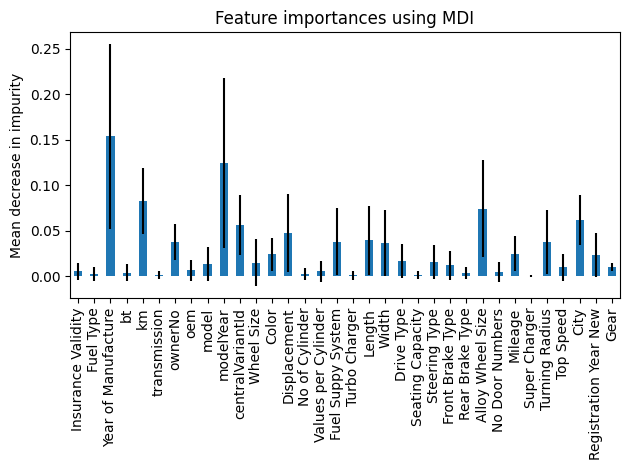

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
#feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [103]:
feature_names[32]

'feature 32'

In [ ]:
categorical_features = df1.select_dtypes(include=['object']).columns
categorical_features

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1[categorical_features] = df1[categorical_features].apply(lambda col: le.fit_transform(col))
df1

In [ ]:
new_categorical_features = df1.select_dtypes(include=['object']).columns
new_categorical_features

In [ ]:
print(df1.columns)

In [ ]:
df1['BoreX Stroke'].value_counts()

In [ ]:
df1.isna().sum()

In [ ]:
df1['Seats_x'].value_counts()

In [ ]:
df1.dtypes

In [ ]:
df1['Top Speed'].value_counts()